In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
from timeit import default_timer as timer
import matplotlib as mpl
import matplotlib.pyplot as plt
import math


INTMAX = 2147483647

# Sorting Algorithms

## Mergesort

[ 6925 -7369 -1897  9179   721  2523  2672   398  5472  5315]
[-7369 -1897   398   721  2523  2672  5315  5472  6925  9179]
0.00037250001332722604
0.0014037500077392906
0.011759540997445583
0.08559533298830502
0.7482871249958407


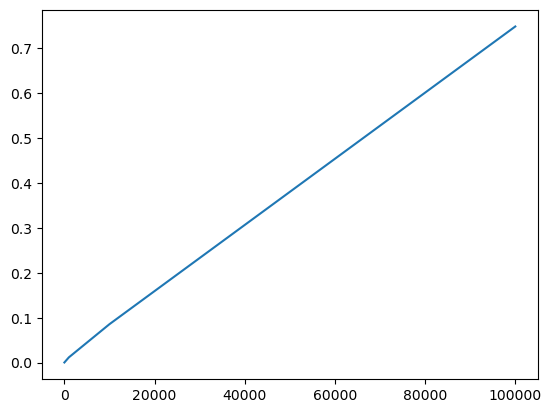

In [2]:
# Take two arrays of length N / 2 and combine them into a sorted array 
# of length N
# Assumes that arr1 and arr2 are already sorted from least to greatest
def merge(A, p, q, r):
    p = int(p)
    q = int(q)
    r = int(r)
    n1 = q - p + 1
    n2 = r - q
    L = np.zeros(n1 + 1)
    R = np.zeros(n2 + 1)
    for i in range(1, n1 + 1):
        L[i - 1] = A[p + i - 1]
    for j in range(1, n2 + 1):
        R[j - 1] = A[q + j]
    L[n1] = INTMAX
    R[n2] = INTMAX
    i = 0
    j = 0
    for k in range(p, r + 1):       
        if L[i] <= R[j]:
            A[k] = L[i]
            i = i + 1
        else:
            A[k] = R[j]
            j = j + 1
    
    return A

# Given an array of length N, split the array into arrays of length 
# N / 2 until sorting is trivial, and recombine subarrays to get 
# the orginal array but sorted. 
def mergesort(A, p, r):
    if p < r:
        q = np.floor((p + r) / 2)
        L = mergesort(A, p, q)
        R = mergesort(A, q + 1, r)
        A = merge(A, p , q, r)
        return A
        
A_10 = np.random.randint(low=-10000, high=10000, size=10)
print(A_10)
p10 = 0
r10 = A_10.size - 1
start1 = timer()
mergesort(A_10, p10, r10)
end1 = timer()
print(A_10)
time1 = end1 - start1
print(time1) # time in seconds

A_100 = np.random.randint(low=-10000, high=10000, size=100)
p100 = 0
r100 = A_100.size - 1
start2 = timer()
mergesort(A_100, p100, r100)
end2 = timer()
time2 = end2 - start2
print(time2) # time in seconds

A_1000 = np.random.randint(low=-10000, high=10000, size=1000)
p1000 = 0
r1000 = A_1000.size - 1
start3 = timer()
mergesort(A_1000, p1000, r1000)
end3 = timer()
time3 = end3 - start3
print(time3) # time in seconds

A_10000 = np.random.randint(low=-10000, high=10000, size=10000)
p10000 = 0
r10000 = A_10000.size - 1
start4 = timer()
mergesort(A_10000, p10000, r10000)
end4 = timer()
time4 = end4 - start4
print(time4) # time in seconds

A_100000 = np.random.randint(low=-10000, high=10000, size=100000)
p100000 = 0
r100000 = A_100000.size - 1
start5 = timer()
mergesort(A_100000, p100000, r100000)
end5 = timer()
time5 = end5 - start5
print(time5) # time in seconds


fig, ax = plt.subplots()
ax.plot([10, 100, 1000, 10000, 100000], [time1, time2, time3, time4, time5])

## Insertion Sort

6.88339932821691e-05
0.0012196250027045608
0.05283550001331605
4.113806374982232
405.77608891698765


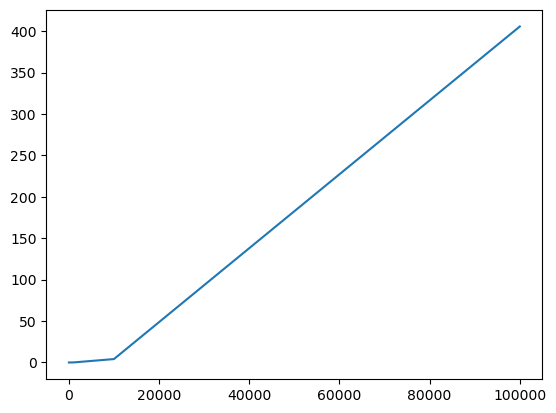

In [26]:
def insertionsort(A):
    for j in range(1, A.size):
        key = A[j]
        i = j - 1
        while (i >= 0 and A[i] > key):
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key

A_10 = np.random.randint(low=-10000, high=10000, size=10)
start1 = timer()
insertionsort(A_10)
end1 = timer()
time1 = end1 - start1
print(time1) # time in seconds

A_100 = np.random.randint(low=-10000, high=10000, size=100)
start2 = timer()
insertionsort(A_100)
end2 = timer()
time2 = end2 - start2
print(time2) # time in seconds

A_1000 = np.random.randint(low=-10000, high=10000, size=1000)
start3 = timer()
insertionsort(A_1000)
end3 = timer()
time3 = end3 - start3
print(time3) # time in seconds

A_10000 = np.random.randint(low=-10000, high=10000, size=10000)
start4 = timer()
insertionsort(A_10000)
end4 = timer()
time4 = end4 - start4
print(time4) # time in seconds

A_100000 = np.random.randint(low=-10000, high=10000, size=100000)
start5 = timer()
insertionsort(A_100000)
end5 = timer()
time5 = end5 - start5
print(time5) # time in seconds


fig, ax = plt.subplots()
ax.plot([10, 100, 1000, 10000, 100000], [time1, time2, time3, time4, time5])

## Quicksort

3.0916009563952684e-05
0.00025262500275857747
0.0035415419843047857
0.029499708994990215
0.39358283299952745


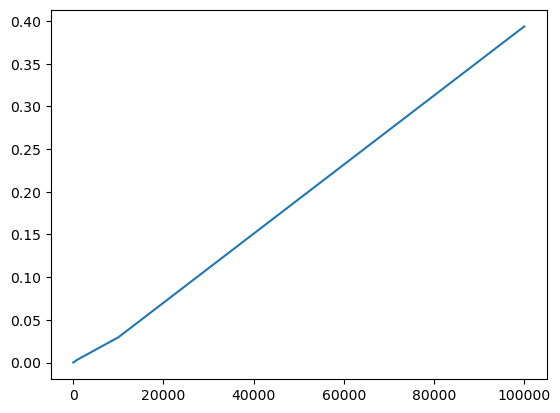

In [3]:
def quicksort(A, p ,r):
    p = int(p)
    r = int(r)
    
    if p < r:
        q = partition(A, p, r)
        quicksort(A, p, q - 1)
        quicksort(A, q + 1, r)

def partition(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            tmp = A[i]
            A[i] = A[j]
            A[j] = tmp
    tmp = A[i + 1]
    A[i + 1] = A[r]
    A[r] = tmp
    return i + 1

A_10 = np.random.randint(low=-10000, high=10000, size=10)
p10 = 0
r10 = A_10.size - 1
start1 = timer()
quicksort(A_10, p10, r10)
end1 = timer()
time1 = end1 - start1
print(time1) # time in seconds

A_100 = np.random.randint(low=-10000, high=10000, size=100)
p100 = 0
r100 = A_100.size - 1
start2 = timer()
quicksort(A_100, p100, r100)
end2 = timer()
time2 = end2 - start2
print(time2) # time in seconds

A_1000 = np.random.randint(low=-10000, high=10000, size=1000)
p1000 = 0
r1000 = A_1000.size - 1
start3 = timer()
quicksort(A_1000, p1000, r1000)
end3 = timer()
time3 = end3 - start3
print(time3) # time in seconds

A_10000 = np.random.randint(low=-10000, high=10000, size=10000)
p10000 = 0
r10000 = A_10000.size - 1
start4 = timer()
quicksort(A_10000, p10000, r10000)
end4 = timer()
time4 = end4 - start4
print(time4) # time in seconds

A_100000 = np.random.randint(low=-10000, high=10000, size=100000)
p100000 = 0
r100000 = A_100000.size - 1
start5 = timer()
quicksort(A_100000, p100000, r100000)
end5 = timer()
time5 = end5 - start5
print(time5) # time in seconds


fig, ax = plt.subplots()
ax.plot([10, 100, 1000, 10000, 100000], [time1, time2, time3, time4, time5])

## Randomized Quicksort

3.962501068599522e-05
0.00023075001081451774
0.0029521250107791275
0.03760699997656047
0.47462220801389776


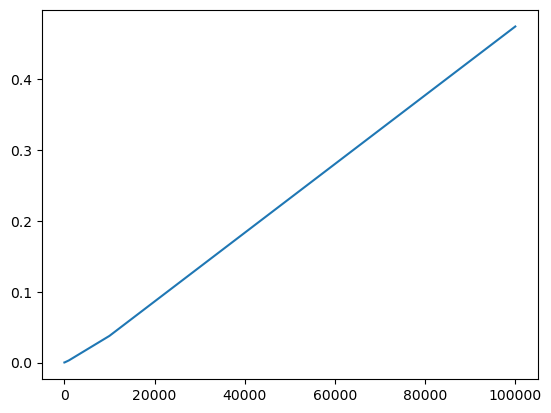

In [4]:
def rand_partition(A, p, r):
    i = np.random.randint(p, r + 1)
    temp = A[i]
    A[i] = A[r]
    A[r] = temp
    return partition(A, p, r)

def rand_quicksort(A, p, r):
    if p < r:
        q = rand_partition(A, p, r)
        rand_quicksort(A, p, q - 1)
        rand_quicksort(A, q + 1, r)
    

def partition(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            # Swap A[i] and A[j]
            temp = A[i]
            A[i] = A[j]
            A[j] = temp
    # Swap A[i + 1] with A[r]
    temp = A[i + 1]
    A[i + 1] = A[r]
    A[r] = temp
    return i + 1

A_10 = np.random.randint(low=-10000, high=10000, size=10)
p10 = 0
r10 = A_10.size - 1
start1 = timer()
rand_quicksort(A_10, p10, r10)
end1 = timer()
time1 = end1 - start1
print(time1) # time in seconds

A_100 = np.random.randint(low=-10000, high=10000, size=100)
p100 = 0
r100 = A_100.size - 1
start2 = timer()
rand_quicksort(A_100, p100, r100)
end2 = timer()
time2 = end2 - start2
print(time2) # time in seconds

A_1000 = np.random.randint(low=-10000, high=10000, size=1000)
p1000 = 0
r1000 = A_1000.size - 1
start3 = timer()
rand_quicksort(A_1000, p1000, r1000)
end3 = timer()
time3 = end3 - start3
print(time3) # time in seconds

A_10000 = np.random.randint(low=-10000, high=10000, size=10000)
p10000 = 0
r10000 = A_10000.size - 1
start4 = timer()
rand_quicksort(A_10000, p10000, r10000)
end4 = timer()
time4 = end4 - start4
print(time4) # time in seconds

A_100000 = np.random.randint(low=-10000, high=10000, size=100000)
p100000 = 0
r100000 = A_100000.size - 1
start5 = timer()
rand_quicksort(A_100000, p100000, r100000)
end5 = timer()
time5 = end5 - start5
print(time5) # time in seconds


fig, ax = plt.subplots()
ax.plot([10, 100, 1000, 10000, 100000], [time1, time2, time3, time4, time5])

## Counting Sort

0.00010899995686486363
0.00028566602850332856
0.0023023750400170684
0.014127250004094094
0.08476854104083031


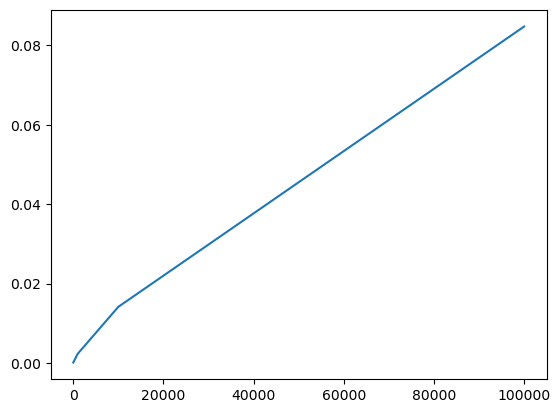

In [2]:
def countingsort(A, B, k):
    C = np.zeros(k + 1)
    
    for j in range(0, A.size - 1):
        C[A[j]] = C[A[j]] + 1
    
    for i in range(0, k + 1):
        C[i] = C[i] + C[i - 1]
    
    for j in range(A.size - 1, -1, -1):
        B[int(C[A[j]])] = A[j]
        C[A[j]] = C[A[j]] - 1

maxVal = 10
size = 10
A_10 = np.random.randint(low=0, high=maxVal, size=size)
B = np.zeros(size)
start1 = timer()
countingsort(A_10, B, maxVal)
end1 = timer()
time1 = end1 - start1
print(time1) # time in seconds

maxVal = 10
size = 100
A_100 = np.random.randint(low=0, high=maxVal, size=size)
B = np.zeros(size)
start2 = timer()
countingsort(A_100, B, maxVal)
end2 = timer()
time2 = end2 - start2
print(time2) # time in seconds

maxVal = 10
size = 1000
A_1000 = np.random.randint(low=0, high=maxVal, size=size)
B = np.zeros(size)
start3 = timer()
countingsort(A_1000, B, maxVal)
end3 = timer()
time3 = end3 - start3
print(time3) # time in seconds

maxVal = 10
size = 10000
A_10000 = np.random.randint(low=0, high=maxVal, size=size)
B = np.zeros(size)
start4 = timer()
countingsort(A_10000, B, maxVal)
end4 = timer()
time4 = end4 - start4
print(time4) # time in seconds

maxVal = 10
size = 100000
A_100000 = np.random.randint(low=0, high=maxVal, size=size)
B = np.zeros(size)
start5 = timer()
countingsort(A_100000, B, maxVal)
end5 = timer()
time5 = end5 - start5
print(time5) # time in seconds

fig, ax = plt.subplots()
ax.plot([10, 100, 1000, 10000, 100000], [time1, time2, time3, time4, time5])

## Radix Sort

In [ ]:
def radixsort(A, d):
    B = np.zeros(A.size)
    for i in range(1, d + 1):
        countingsort(A, B, 9)
    

## Bucket Sort

In [19]:
# Assumes  0 <= A[i] <= 1
def bucketsort(A):
    n = A.size
    B = []
    
    for i in range(0, n):
        B.append([])
    
    for i in range(1, n):
        print(math.floor(n * A[i]))
        B[math.floor(n * A[i])] = A[i]
        
    for i in range(0, n):
        insertionsort(B[i])
    
    C = np.empty()
    for i in range(0, n):
        C = np.concatenate((C, B[i]))
    return C

In [22]:
A_10 = np.random.randint(low=0, high=2, size=10)
print(A_10)
p10 = 0
r10 = A_10.size - 1
start1 = timer()
A_10 = bucketsort(A_10)
end1 = timer()
print(A_10)
time1 = end1 - start1
print(time1) # time in seconds

[1 0 0 1 1 0 1 0 1 1]
0
0
10


IndexError: list assignment index out of range

## Heapsort

In [1]:
# Interace described by CLRS
import math
class BHeap:
    def __init__(self, x = []):
        self.A = x
        self.length = len(self.A)
        self.heap_size = len(self.A)
        
    def parent(self, i):
        return math.floor(i / 2) 
        
    def left(self, i):
        return (2 * i) + 1
    
    def right(self, i):
        return (2 * i) + 2
        
    def max_heapify(self, i):
        l = self.left(i)
        r = self.right(i)
        if (l <= self.heap_size - 1 and self.A[l] > self.A[i]):
            largest = l
        else:
            largest = i
        if (r <= self.heap_size - 1 and self.A[r] > self.A[largest]):
            largest = r
        if (largest != i):
            tmp = self.A[i]
            self.A[i] = self.A[largest]
            self.A[largest] = tmp
            self.max_heapify(largest)
         
    def build_max_heap(self):
        self.heap_size = self.length
        # for i from floor(length / 2) downto 1
        for i in range(math.floor(self.length / 2), -1, -1):
            self.max_heapify(i)
        
    def heapsort(self):
        self.build_max_heap()
        for i in range(self.length - 1, 0, -1):
            tmp = self.A[0]
            self.A[0] = self.A[i]
            self.A[i] = tmp
            self.heap_size = self.heap_size - 1
            self.max_heapify(0)
       

    
MP1 = BHeap([1, 5, 65, 43, 21, 67, 87, 65])
print(MP1.A)
MP1.build_max_heap()
print(MP1.A)
MP1.heapsort()
print(MP1.A)     

[1, 5, 65, 43, 21, 67, 87, 65]
[87, 65, 67, 43, 21, 1, 65, 5]
[1, 5, 21, 43, 65, 65, 67, 87]
